<h1>Regressão logística</h1>
</br>
Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

<h3>Titanic Dataset</h3></br>
O dataset no qual vamos testar o modelo é o do Titanic. Esse dataset tem informações sobre os passageiros do Titanic e seu objetivo é identificar que passageiros sobreviveram. 

In [2]:
titanic = pd.read_csv('titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observe que há pessoas com idade desconhecida. Para que possamos aplicar o nosso modelo, é necessário lidar com isso. Nesse exemplo, vamos simplesmente ignorar as pessoas cuja idade não sabemos.

In [4]:
titanic = titanic.dropna(subset=['Age'])

Nesse exemplo, vamos utilizar apenas as seguintes variáveis:

    - Age: idade do passageiro (em anos)
    - Fare: custo da passagem
    - Survived: 1 se o passageiro sobreviveu, 0 caso contrário

In [5]:
x = titanic[['Age', 'Fare']]
y = titanic['Survived']

<h3>Aplicação do Modelo</h3>

In [6]:
lr = LogisticRegression()
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy') # validação cruzada
print('Acurácia média:', scores.mean())

Acurácia média: 0.6554577464788732


<h3>Visualização do Modelo</h3></br>
No gráfico abaixo, podemos ter uma ideia da distribuição dos dados. Como há muitos pontos próximos, utilizamos o parâmetro alpha=.4, que faz com que os pontos fiquem parciamente transparentes. Assim, conseguimos ter uma ideia de onde há mais pontos, mesmo que eles estejam acumulados um em cima do outro.

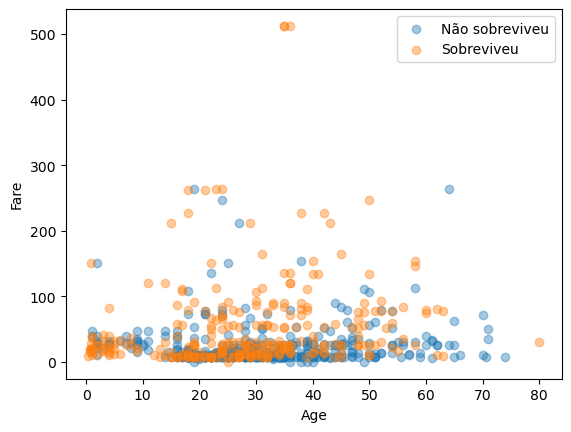

In [7]:
def plot_scatter():
    plt.scatter(x['Age'][y == 0], x['Fare'][y == 0], alpha=.4, label='Não sobreviveu')
    plt.scatter(x['Age'][y == 1], x['Fare'][y == 1], alpha=.4, label='Sobreviveu')
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Fare')
plot_scatter()

Agora podemos testar o nosso modelo com algumas pessoas aleatórias.

In [8]:
df_pessoas = pd.DataFrame([[20, 500],  # pessoa 1
                           [75, 100]]) # pessoa 2
df_pessoas.columns = ["Age", "Fare"]
lr.fit(x, y)
print('Classificações:\n', lr.predict(df_pessoas))
print('Probabilidades:\n', lr.predict_proba(df_pessoas))

Classificações:
 [1 0]
Probabilidades:
 [[3.85544617e-04 9.99614455e-01]
 [5.02395213e-01 4.97604787e-01]]


O nosso modelo prediz que a primeira pessoa (20 anos, pagou 500) sobreviveu e a segunda (100 anos, pagou 100) não sobreviveu. Além disso, a probabilidade da pessoa 1 sobreviver é de 99%, enquanto a probabilidade da pessoa 2 morrer é de apenas 50,6%.

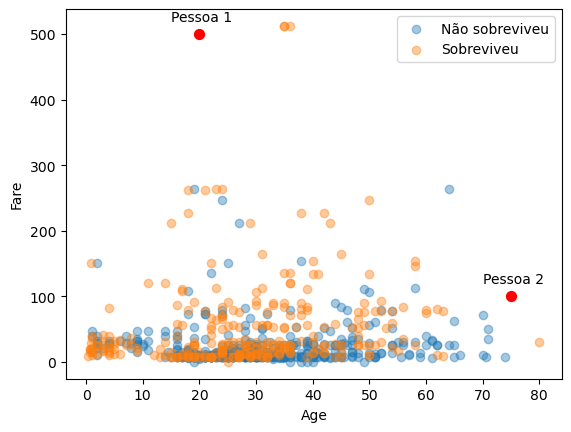

In [9]:
plt.scatter([20, 75], [500, 100], c='red', s=50)
plt.annotate('Pessoa 1', (15, 520))
plt.annotate('Pessoa 2', (70, 120))
plot_scatter()

<h1>Acrescentando uma informação importante</h1>

No código abaixo, vamos acrescentar a variável "sex" como variável independente.

In [10]:
titanic = titanic.replace({'male':1,'female':0})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
x = titanic[['Age', 'Sex','Fare']]
y = titanic['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy') # validação cruzada
print('Acurácia média:', scores.mean())

Acurácia média: 0.7758020344287949


Como ficaria visualmente?

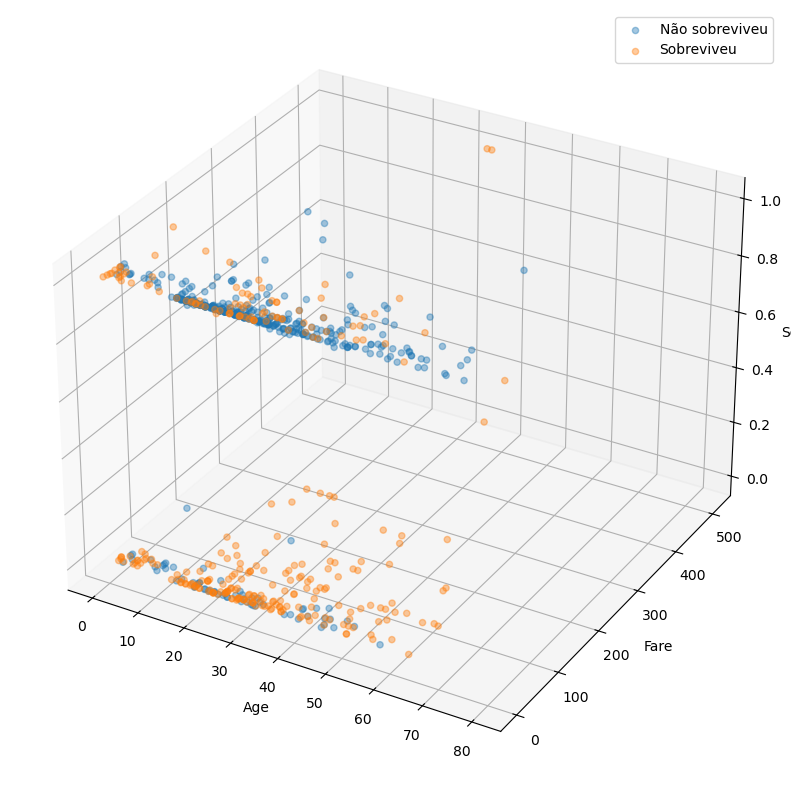

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x['Age'][y == 0], x['Fare'][y == 0], x['Sex'][y == 0], alpha=.4, label='Não sobreviveu')
ax.scatter(x['Age'][y == 1], x['Fare'][y == 1], x['Sex'][y == 1], alpha=.4, label='Sobreviveu')
plt.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Sex')
plt.show()